# Figures and Tables

This notebook serves as a playground for developing figures and tables for this project.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd '/Users/ssomani/research/heartlab/statins_reddit/'

/Users/ssomani/research/heartlab/statins_reddit


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap as lin_seg_cmap

In [4]:
import numpy as np
import pandas as pd

In [5]:
import pickle

In [6]:
from reddit.topic_modeling import BERedditTopics, config as bert_config

/Users/ssomani/mambaforge/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
save_dir = 'reports/figures/'

In [8]:
config = {
    'axis_label' : 14,
    'tick_label' : 12,
    'title' : 20,
    'subplot_title' : 16,
}

In [9]:
# plt.rcParams.update({'font.family':'Computer Modern'})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = "CMU Sans Serif"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = 'cm' 

## Figure 1

In [8]:
# Gather the data
df = pd.read_excel('data/raw/posts_comms_20220712.xlsx')
df['date_year'] = pd.to_datetime(df['date']).dt.year.astype('int')

# Sort our subreddits by their frequency for our ridgeline plot.
df['_subreddit_sort'] = df['subreddit'].map(df['subreddit'].value_counts())
df = df.sort_values(by='_subreddit_sort', ascending=False)

# Get all years represented
years = np.array(df['date_year'].unique(), dtype='int')

In [18]:
year_data = df['date_year'].value_counts().loc[np.arange(2009, 2022)]

In [32]:
np.mean(100 * (np.array(year_data.iloc[3:]) - np.array(year_data.iloc[2:-1])) / np.array(year_data.iloc[2:-1]))

32.96156491472758

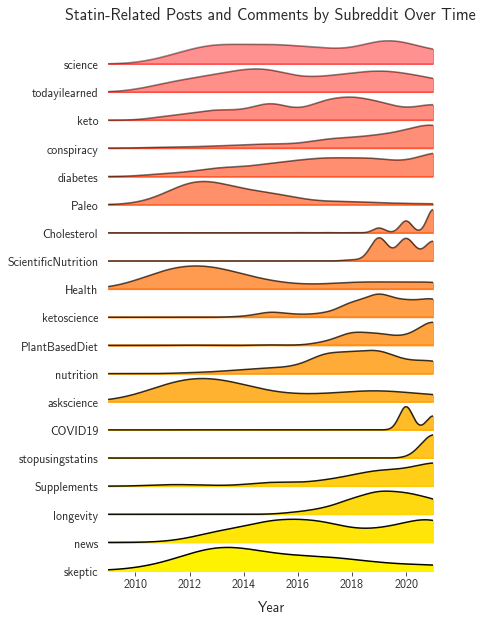

In [149]:
fig1b, ax1b = joyplot(df.groupby('subreddit', sort=False), column='date_year', 
             ylim='own', overlap=0.05, figsize=(6, 8), \
             colormap=cm.autumn, fade=True, x_range=(years.min(), 2021),
               )

# ax1b[-1].set_xticks(years)
ax1b[-1].set_xticklabels(ax1b[-1].get_xticklabels(), fontsize=config['tick_label'])
ax1b[-1].set_xlabel('Year', fontsize=config['axis_label'], labelpad=10)

for ax1bi in ax1b:
    ax1bi.set_yticklabels(ax1bi.get_yticklabels(), fontsize=config['tick_label'])

ax1b[0].set_title('Statin-Related Posts and Comments by Subreddit Over Time', fontsize=config['subplot_title'], pad=20)

plt.savefig(save_dir + 'Figure1B.svg', bbox_inches='tight')

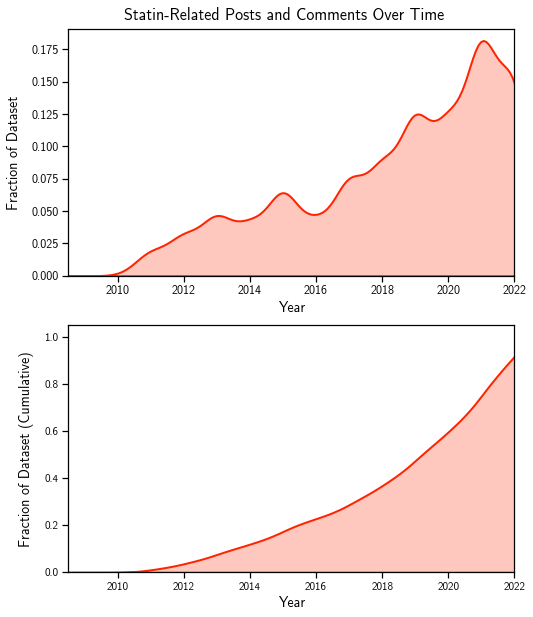

In [13]:
with sns.plotting_context('notebook'):
    sns.set_palette('autumn')
    fig, ax = plt.subplots(2, 1, figsize=(8, 10))
    sns.kdeplot(df['date_year'], shade=True, linewidth=2, ax=ax[0])
    ax[0].set_xlabel('Year', fontsize=config['axis_label'])
    ax[0].set_xlim((years.min() - 0.5, 2022))
    ax[0].set_ylabel('Fraction of Dataset', fontsize=config['axis_label'], labelpad=10)
    ax[0].tick_params(labelsize=config['tick_label'])
    
    sns.kdeplot(df['date_year'], linewidth=2, shade=True, cumulative=True, ax=ax[1])
    ax[1].set_xlabel('Year', fontsize=config['axis_label'])
    ax[1].set_xlim((years.min() - 0.5, 2022))
    ax[1].set_ylabel('Fraction of Dataset (Cumulative)', fontsize=config['axis_label'], labelpad=10)
    
    
    fig.suptitle('Statin-Related Posts and Comments Over Time', fontsize=config['subplot_title'], y=0.91)
    
    plt.savefig(save_dir + 'Figure1A.svg', transparent=True)

## Load Topic Model

In [14]:
# topic_model = BERedditTopics(bert_config)
# topic_model.load_data_frame()
# topic_model.create_topic_model()
# topic_model.create_groups()

# # Save this for now, so we don't have to repeat all these steps again.
# with open('models/topic_model_object_save.pkl', 'wb') as f:
#     pickle.dump(topic_model, f, pickle.HIGHEST_PROTOCOL)

In [39]:
with open('models/topic_model_object_save.pkl', 'rb') as f:
    topic_model = pickle.load(f)

/Users/ssomani/mambaforge/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Figure 2

In [37]:
def create_figure_2a():
    topic_labels = [str(i + 1) + ' : ' + j for i, j in enumerate(topic_model.topic_model.generate_topic_labels(nr_words=3, topic_prefix=False, word_length=10, separator=", "))]
    topic_model.topic_model.set_topic_labels(topic_labels)
    
    fig2a = topic_model.topic_model.visualize_hierarchy(orientation='bottom', custom_labels=True)
    
    fig2a = fig2a.update_layout(plot_bgcolor="white", font_family='CMU Sans Serif', title_font={'size' : 1.23 * config['subplot_title']})
    
    fig2a = fig2a.update_xaxes(tickfont={'size' : 1.23 * config['tick_label']}, title_font={'size' : 1.23 * config['axis_label']})
    fig2a = fig2a.update_yaxes(tickfont={'size' : 1.23 * config['tick_label']}, title_font={'size' : 1.23 * config['axis_label']})
    
    fig2a.write_image(save_dir + 'Figure2A.svg')
    
    return fig2a

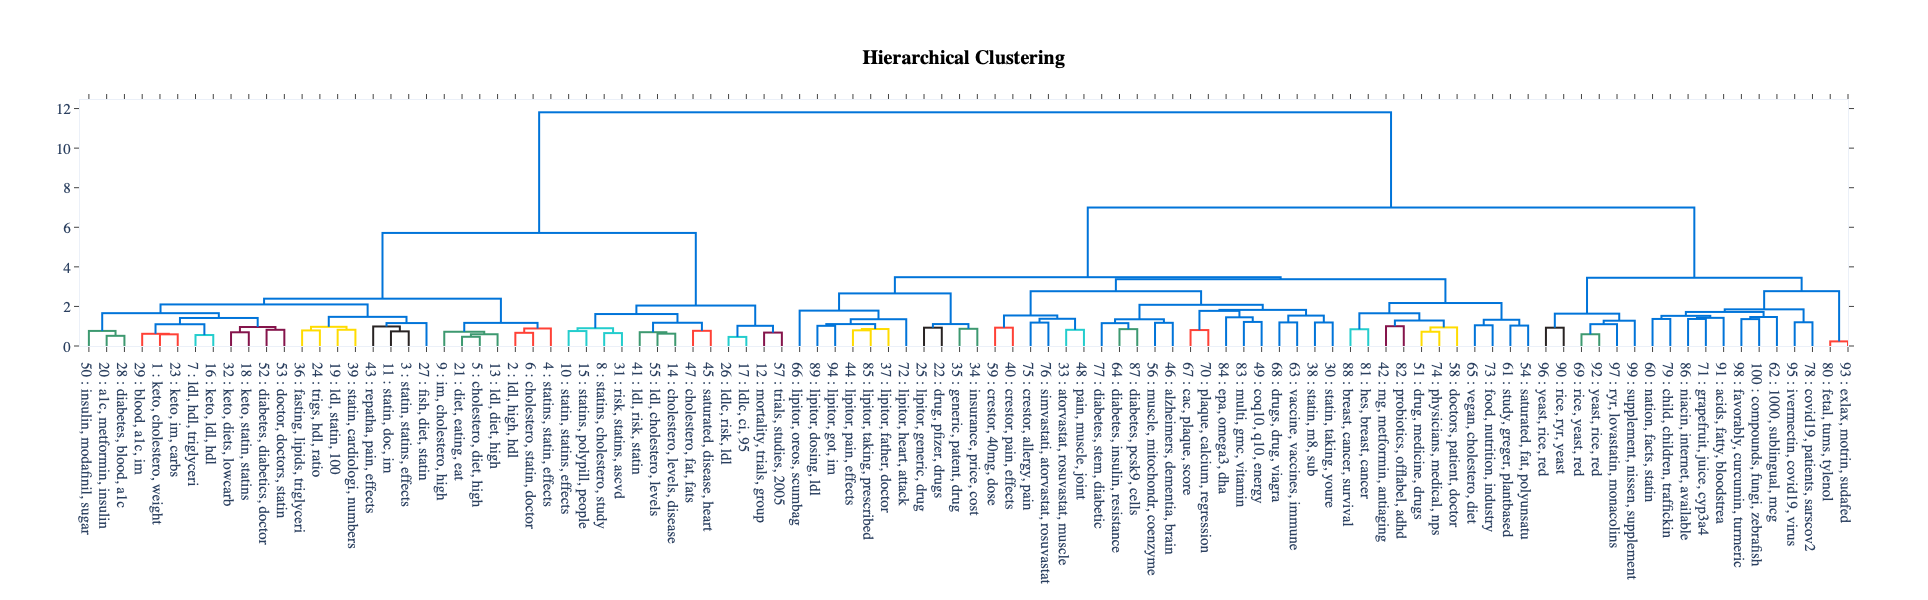

In [38]:
create_figure_2a()

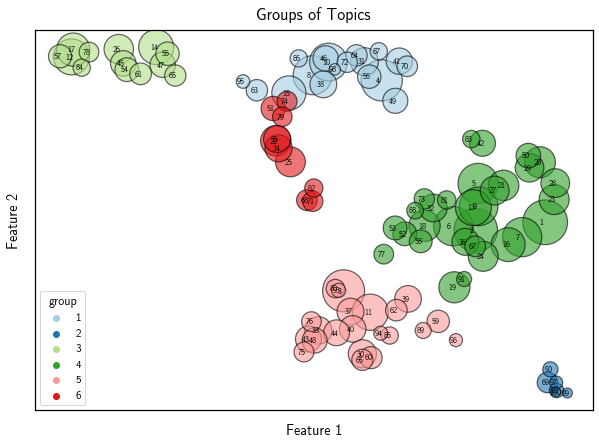

In [21]:
with sns.plotting_context('notebook'):
    plt.figure(figsize=(10, 7))
    ax = sns.scatterplot(*topic_model.c_tf_idf_vis.T, size=topic_model.topic_model.get_topic_info()['Count'], \
                    hue=topic_model.groups, sizes=(100, 2000), \
                    alpha=0.6, palette='Paired', legend=True, edgecolor='k')
    
    h,l = ax.get_legend_handles_labels()
    
    for i, coords in enumerate(topic_model.c_tf_idf_vis):
        ax.annotate(i + 1, coords - [0.09, 0.05], fontsize=8)
    
    plt.legend(h[0:6],l[0:6], title='group', loc=3)
    
    ax.set_title('Groups of Topics', fontsize=config['subplot_title'], pad=10)
    ax.set_xlabel('Feature 1', fontsize=config['axis_label'])
    ax.set_ylabel('Feature 2', fontsize=config['axis_label'])
    ax.tick_params(labelsize=config['tick_label'], top=False, bottom=False, left=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    plt.savefig(save_dir + 'Figure2B.svg', bbox_inches='tight', transparent=True)

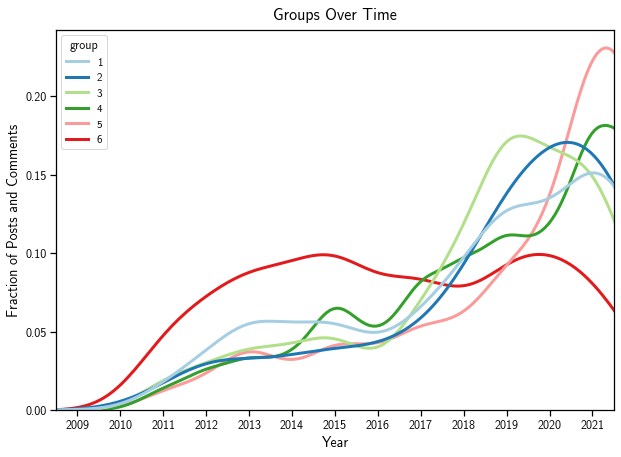

In [40]:
with sns.plotting_context('notebook'):

    df = topic_model.raw_df.iloc[:, :]
    
    df['topic'] = topic_model.topics
    kw = ['"' + '", "'.join([i[0] for i in topic_model.topic_model.get_topic(j)]) + '"' for j in range(0, 100)]
    df['group'] = [topic_model.groups[i] for i in df['topic']]
    df['keywords'] = [kw[i] for i in df['topic']]
    df['date_year'] = pd.to_datetime(df['date']).dt.year.astype('int')
    years = np.array(df['date_year'].unique(), dtype='int')
    
    _, ax = plt.subplots(figsize=(10, 7))
    ax = sns.kdeplot(data=df, x='date_year', hue='group', palette='Paired', common_norm=False, linewidth=3, ax=ax)
    ax.set_xlabel('Year', fontsize=config['axis_label'])
    ax.set_xticks(years)
    ax.set_xlim((years.min() - 0.5, 2021.5))
    ax.set_ylabel('Fraction of Posts and Comments', fontsize=config['axis_label'])
    ax.tick_params(labelsize=config['tick_label'])
    ax.set_title('Groups Over Time', fontsize=config['subplot_title'], pad=10)
    
    plt.savefig(save_dir + 'Figure2C.svg', bbox_inches='tight', transparent=True)

## Figure 3

In [6]:
sentiments = pd.read_excel('data/processed/sentiments.xlsx')
sentiments['net_t'] = sentiments['net'] - 1

In [7]:
sentiments

,Unnamed: 0,id,subreddit,query,type,author,content,date,upvotes,topic,group,keywords,date_year,negative,neutral,positive,net,net_t
0,0,690frt,science,statin,post,[deleted],A new study helps debunk the widespread belief...,2017-05-03 06:47:46,0,55,1,"""muscle"", ""mitochondrial"", ""coenzyme"", ""q10"", ...",2017,0.867437,0.131686,0.000877,0,-1
1,1,4ifouo,todayilearned,lovastatin,post,[deleted],TIL When Merck Co. alleged Apotex infringed it...,2016-05-08 11:27:27,0,67,6,"""drugs"", ""drug"", ""viagra"", ""morphine"", ""2019nc...",2016,0.964844,0.034690,0.000466,0,-1
2,2,5h0c5g,keto,statin,post,sandy2622,I want to do keto...have health questions!. He...,2016-12-07 07:03:57,0,22,4,"""keto"", ""im"", ""carbs"", ""weight"", ""lbs"", ""blood...",2016,0.824795,0.174288,0.000917,0,-1
3,3,hkqpe9,keto,statin,post,SupraFast7159,High LDL - 9 months of Keto. My doctor is eage...,2020-07-03 13:50:26,0,15,4,"""keto"", ""ldl"", ""hdl"", ""ldlp"", ""high"", ""test"", ...",2020,0.000759,0.998664,0.000577,1,0
4,4,ccrpay,keto,simvastatin,post,Jamaican_Baconx,High Cholesterol and LDL. I have a cholesterol...,2019-07-13 10:09:37,0,0,4,"""keto"", ""cholesterol"", ""weight"", ""im"", ""months...",2019,0.001342,0.998008,0.000650,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,10228,co9d4e9,diabetes,lovastatin,comment,altintx,"I swing between A1c of 5.8-6.2, and my cholest...",2015-02-02 17:56:10,1,42,5,"""repatha"", ""pain"", ""effects"", ""rosuvastatin"", ...",2015,0.001200,0.998256,0.000544,1,0
10229,10229,cibgfko,diabetes,lovastatin,comment,Smokeya,"Goto any store with a pharmacy, they sell some...",2014-06-19 00:45:36,2,19,4,"""a1c"", ""metformin"", ""insulin"", ""glucose"", ""rbc...",2014,0.004189,0.994653,0.001159,1,0
10230,10230,cgizrzz,diabetes,lovastatin,comment,i4k20z3,"No, I do take other medications. Including a l...",2014-04-03 06:07:28,1,5,4,"""cholesterol"", ""statin"", ""doctor"", ""statins"", ...",2014,0.000553,0.998853,0.000594,1,0
10231,10231,c4kta4n,diabetes,lovastatin,comment,jordanlund,Watch the potassium as one of the side effects...,2012-05-06 12:49:46,1,82,4,"""multi"", ""gmc"", ""vitamin"", ""k2"", ""magnesium"", ...",2012,0.016891,0.982492,0.000617,1,0


In [62]:
(sentiments.groupby('subreddit')['net_t']).describe().sort_values('count', ascending=False)[['mean', 'std']].to_excel(save_dir + 'SuppTable2.xlsx')

In [29]:
[i for i in sentiments.loc[sentiments['positive'] > 0.98, 'content'] if len(i) < 200]

['It was probably mostly the statin and exercise. Congrats nonetheless',
 'Get ready for that crestor boys, grill up!',
 "I love taking my simvastatin.  Not only did it cut reduce my HDL 80 - 100%, but it also cured my psoriasis.  (This secondary benefit has been reported but hasn't been fully studied.) ",
 "Damn, well that adds more fuel to my no statin fire, I'm on keto to avoid diabetes not looking to wreck that with medicine lol",
 "I've been trying to use keto to get my my statin and Bo meds as well so this is very inspiring.  Congratulations!!!",
 '63 lbs down and your lipid panel is normal, &amp; off of  the Statin. I will say,... Outstanding job !',
 'I take a low dose statin and it been great for my cholesterol numbers.',
 'My Triglycerides on Keto went down to 78 WITHOUT using Lipitor. My HDL also went up to 54 for the first  time with use of ANY statin drugs. Keto is amazing!',
 "That's great!  Since I've been on keto I've stopped taking both my statin and my blood pressure 

In [14]:
sentiments.loc[sentiments['positive'].argmax(), 'content']

'I love Crestor, the taste is better 🤪'

-0.640625 0.0


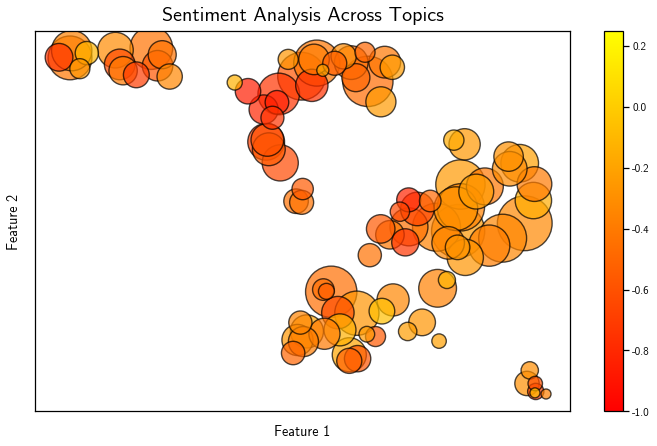

In [11]:
sentiments = pd.read_excel('data/processed/sentiments.xlsx')

with sns.plotting_context('notebook'):
    
    sentiment = sentiments.groupby('topic')['net'].mean() - 1
    print(sentiment.min(), sentiment.max())
    
    norm = plt.Normalize(-1, 0.25)
    sm = plt.cm.ScalarMappable(cmap="autumn", norm=norm)
    sm.set_array([])
    
    plt.figure(figsize=(12, 7))
    ax = sns.scatterplot(*topic_model.c_tf_idf_vis.T, size=topic_model.topic_model.get_topic_info()['Count'], \
                    hue=sentiment, hue_norm=(-0.75, 0.25), sizes=(100, 3000), \
                    alpha=0.7, palette='autumn', legend=True, edgecolor='k')
    ax.set_title('Sentiment Analysis Across Topics', fontsize=config['title'], pad=10)
    
    # Remove the legend and add a colorbar
    ax.get_legend().remove()
    ax.figure.colorbar(sm)
    
    ax.set_xlabel('Feature 1', fontsize=config['axis_label'])
    ax.set_ylabel('Feature 2', fontsize=config['axis_label'])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    ax.tick_params(labelsize=config['tick_label'], top=False, bottom=False, left=False)
    
    plt.savefig(save_dir + 'Figure4.svg', bbox_inches='tight', transparent=True)

## Supplemental Figures

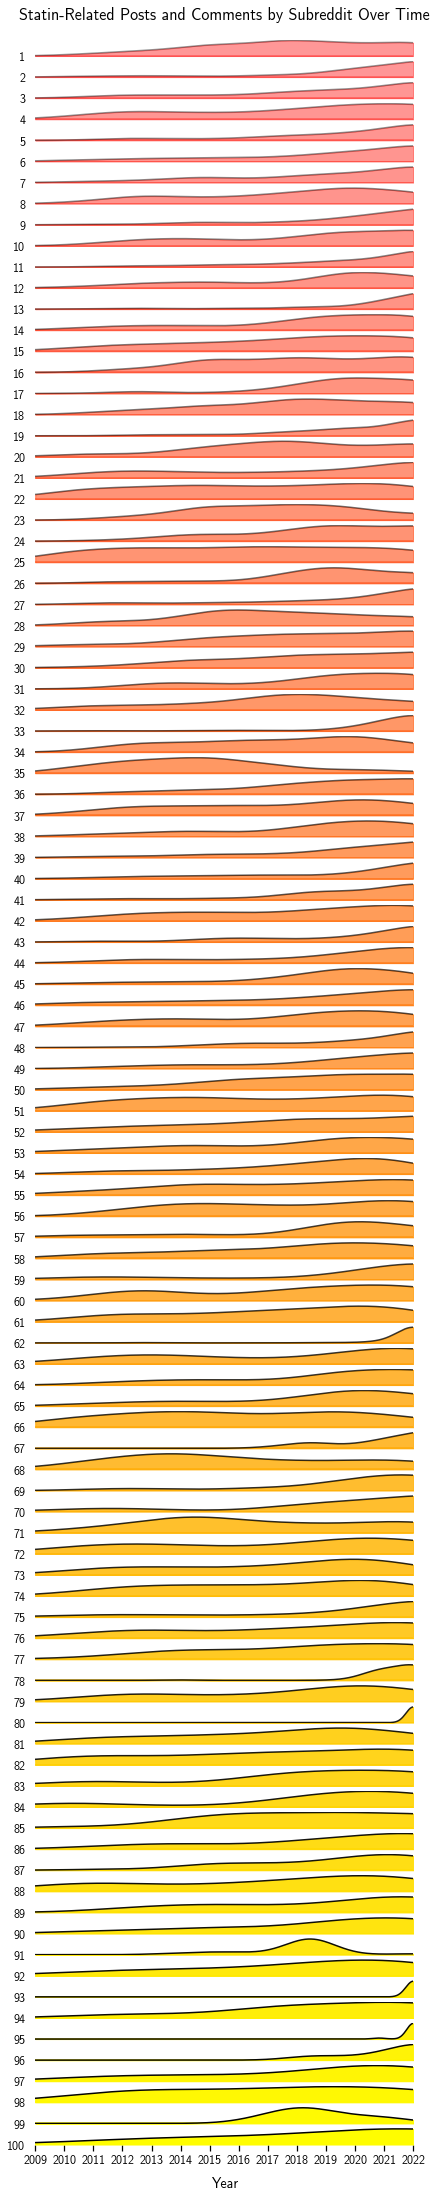

In [41]:
def create_supp_figure_2():
    from matplotlib import cm

    with sns.plotting_context('notebook'):

        df_sorted = df.sort_values(by='topic', ascending=True)
        df_sorted['topic'] += 1

        _, ax = joyplot(df_sorted.groupby('topic', sort=False), column='date_year', \
                     ylim='own', overlap=0.05, figsize=(6, 30), \
                     colormap=cm.autumn, fade=True, x_range=(2010, 2021),
                       )

        ax[-1].set_xticks(years)
        ax[-1].set_xticklabels(years, fontsize=config['tick_label'])
        ax[-1].set_xlabel('Year', fontsize=config['axis_label'], labelpad=10)

        for axi in ax:
            axi.set_yticklabels(axi.get_yticklabels(), fontsize=config['tick_label'])

        ax[0].set_title('Statin-Related Posts and Comments by Subreddit Over Time', fontsize=config['subplot_title'], pad=20)
        
        plt.savefig(save_dir + 'SuppFig2.svg', bbox_inches='tight')
        
create_supp_figure_2()

top silhouette score: 0.574 for at n_clusters 6
top davies-bouldin score: 0.569 for at n_clusters 6


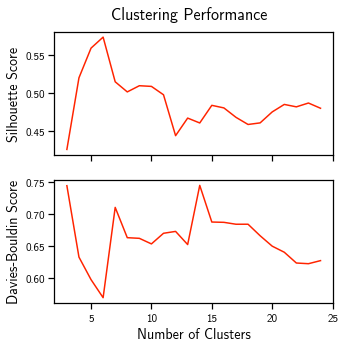

In [42]:
def create_supp_figure_3():
    
    from matplotlib import cm

    cluster_arr, ss, db = topic_model.find_silhouette_scores(topic_model.c_tf_idf_embed, return_plot_data=True)

    with sns.plotting_context('notebook'):
        sns.set_palette('autumn')

        fig2b, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5, 5))

        sns.lineplot(x=cluster_arr, y=ss, palette='autumn', ax=ax[0])
        sns.lineplot(x=cluster_arr, y=db, palette='autumn', ax=ax[1])

        ax[0].set_ylabel('Silhouette Score', fontsize=config['axis_label'])
        ax[1].set_ylabel('Davies-Bouldin Score', fontsize=config['axis_label'])

        ax[1].set_xlabel('Number of Clusters', fontsize=config['axis_label'])

        fig2b.suptitle('Clustering Performance', fontsize=config['subplot_title'], y=0.95)
        
    plt.savefig(save_dir + 'SuppFig3.svg', bbox_inches='tight')
    
create_supp_figure_3()

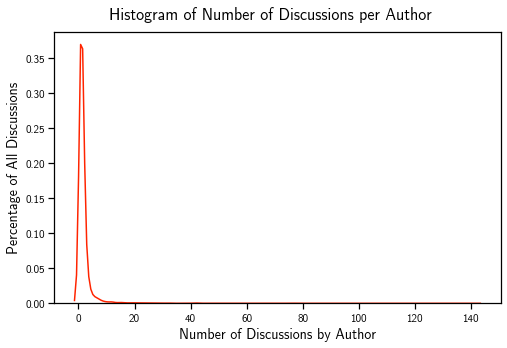

In [43]:
def create_supp_figure_1():
    
    from matplotlib import cm

    with sns.plotting_context('notebook'):
        sns.set_palette('autumn')

        fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8, 5))

        sns.kdeplot(df['author'].value_counts().drop('[deleted]'), palette='autumn', ax=ax)

        ax.set_ylabel('Percentage of All Discussions', fontsize=config['axis_label'])
        ax.set_xlabel('Number of Discussions by Author', fontsize=config['axis_label'])

        fig.suptitle('Histogram of Number of Discussions per Author', fontsize=config['subplot_title'], y=0.95)
        
    plt.savefig(save_dir + 'SuppFig1.svg', bbox_inches='tight')
    
create_supp_figure_1()

In [33]:
np.histogram(df['author'].value_counts().drop('[deleted]'), bins=35)

(array([4909,  159,   47,   21,   12,   11,    6,    4,    1,    1,    5,
           2,    1,    1,    0,    1,    1,    0,    1,    1,    0,    1,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    1]),
 array([  1.,   5.,   9.,  13.,  17.,  21.,  25.,  29.,  33.,  37.,  41.,
         45.,  49.,  53.,  57.,  61.,  65.,  69.,  73.,  77.,  81.,  85.,
         89.,  93.,  97., 101., 105., 109., 113., 117., 121., 125., 129.,
        133., 137., 141.]))

In [35]:
4909 / 5187

0.9464044727202622